                
# Churn Analysis, preventing more

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stts
from scipy.stats import binom
from scipy.stats import mode
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

churn_cx = pd.read_csv("Customer_Info.csv")
churn_loc= pd.read_csv('Location_Data.csv')
churn_onl_serv= pd.read_csv('Online_Services.csv')
churn_serv_opt= pd.read_csv('Service_Options.csv')
churn_pay= pd.read_csv("Payment_Info.csv")
churn_stat = pd.read_csv("Status_Analysis.csv")
churn_full = churn_cx.merge(churn_loc, on='customer_id').merge(churn_onl_serv.drop(['phone_service','internet_service'], axis=1), on='customer_id').merge(churn_serv_opt, on='customer_id').merge(churn_pay, on='customer_id').merge(churn_stat)
churn_full['age_bin'] = pd.cut(churn_full['age'], [18, 20, 30, 40, 50, 60, 70, 80], labels=['to 20','to 30','to 40','to 50','to 60','to 70','to 80'])
churn_full = churn_full.replace({'Yes':True, 'No':False})



### Data:

The following project uses a dataset containing information on customers and how they related to the company, with a final detail that is very important; wether they churned at the end of the season or not. 

### Context:

The company of telecomunications gives services of internet, phone, cable; with different combinations and levels for them, but feels the drop of customers from their side each season, and wants to address the problem for the most likely root cause for it.

### Process:

Using tools like python and multiple libraries (Pandas, Numpy, pyplot, seaborn, scipy) to import, clean, describe and then analyze the data. The process will explore relationship of the variables of interest, and find fields that may correlate by more than mere chance, finally addressing the most likely root cause for the problem.

### Conclude:

At the end of the project a final conclusion will be given as well as a the point of attention, driven by data to focus on and make decisions.

### Additional resources:

Externally there is a report in Power Bi to explore dinamically and will be shared upon request or available in other sections of the portfolio.

## Overall rate of churn:

In [7]:
print(round(churn_full['churn_label'].value_counts(normalize=True),2) * 100)

False    73.0
True     27.0
Name: churn_label, dtype: float64


# Demographics:
## Gender:

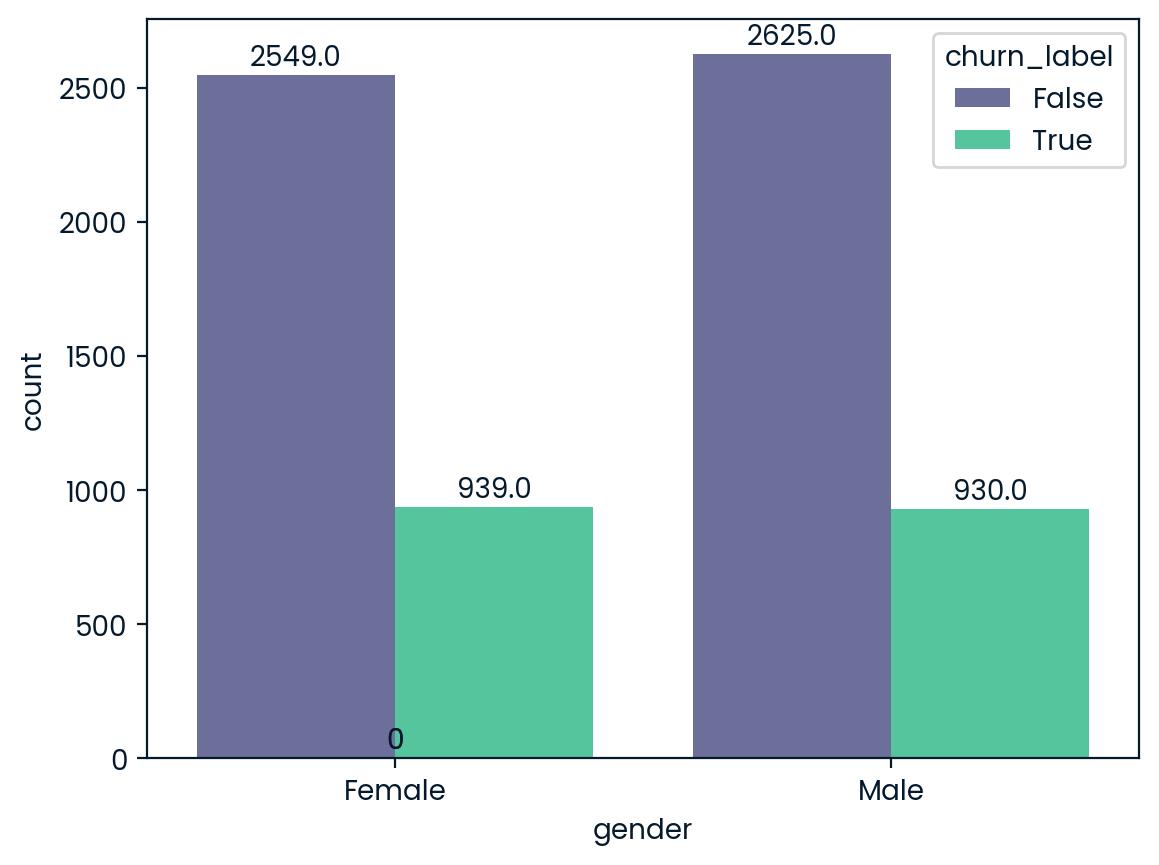

In [8]:
ax = sns.countplot(data=churn_full, x='gender', hue='churn_label')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 1),  # 10 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

## Age:

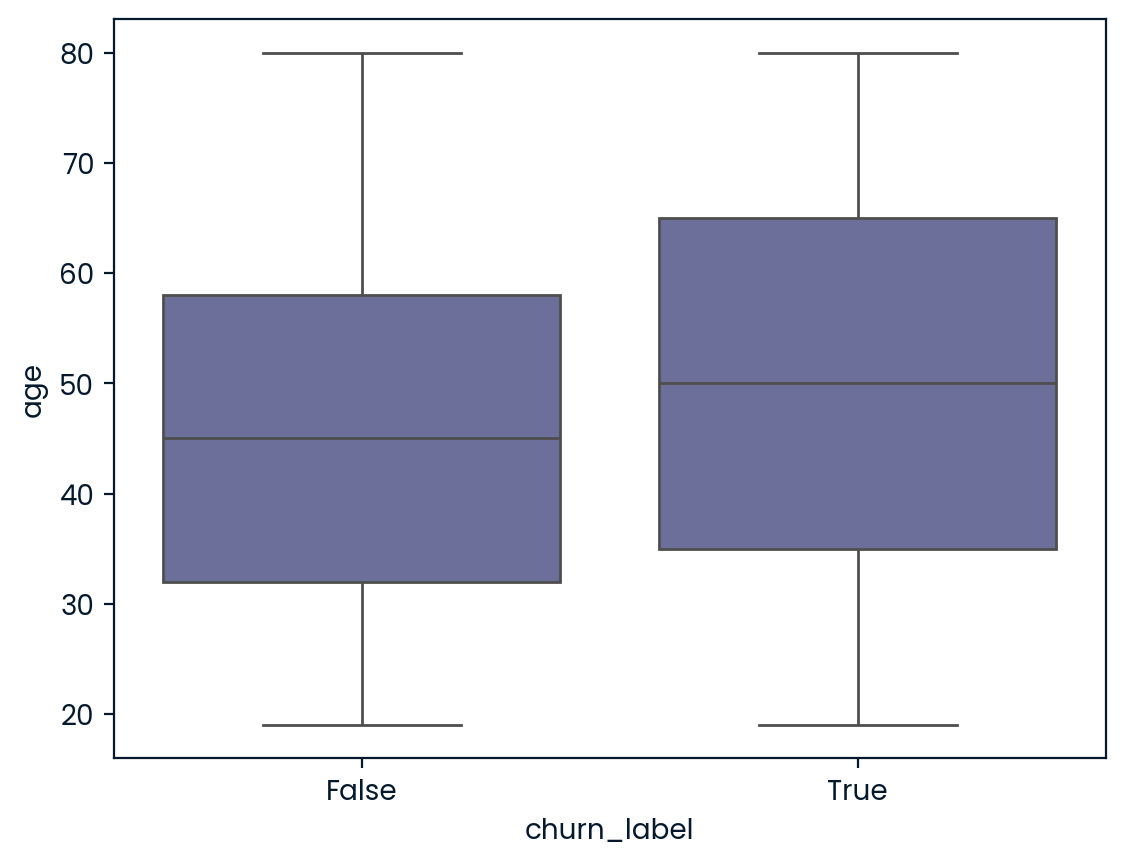

In [9]:
sns.boxplot(y='age', x='churn_label', data=churn_full)
plt.show()

## Married status:

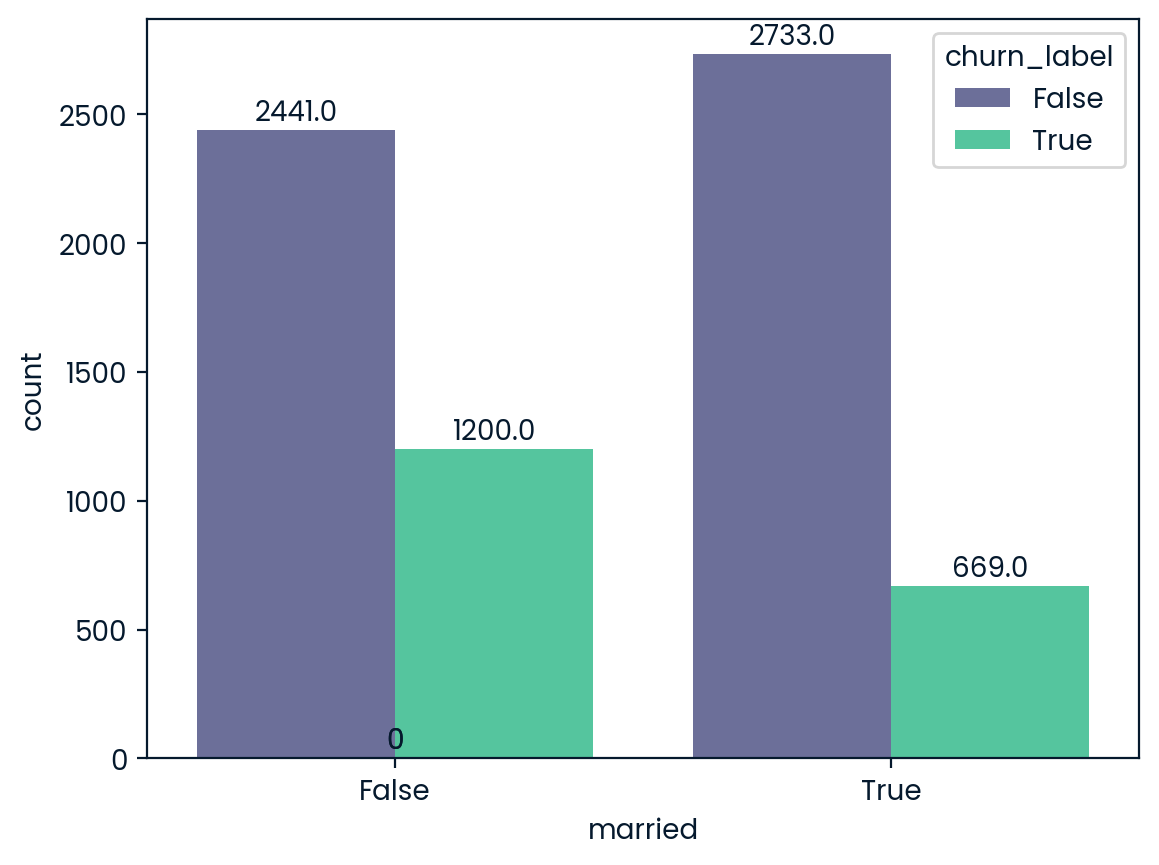

In [10]:
ax = sns.countplot(x='married', data=churn_full, hue='churn_label')
#for i in [True, False]:
 #   for j in [True, False]:
#        plt.axhline(y=len(churn_full[(churn_full['married'] == i) & (churn_full['churn_label'] == j)]),c='red', linestyle=':')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 1),  # 10 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()
#samp_married = churn_full[['churn_label', 'married']]
#samp_married
#print(samp_married.value_counts(normalize=True))

# Correlations of interest.

## Contract type:

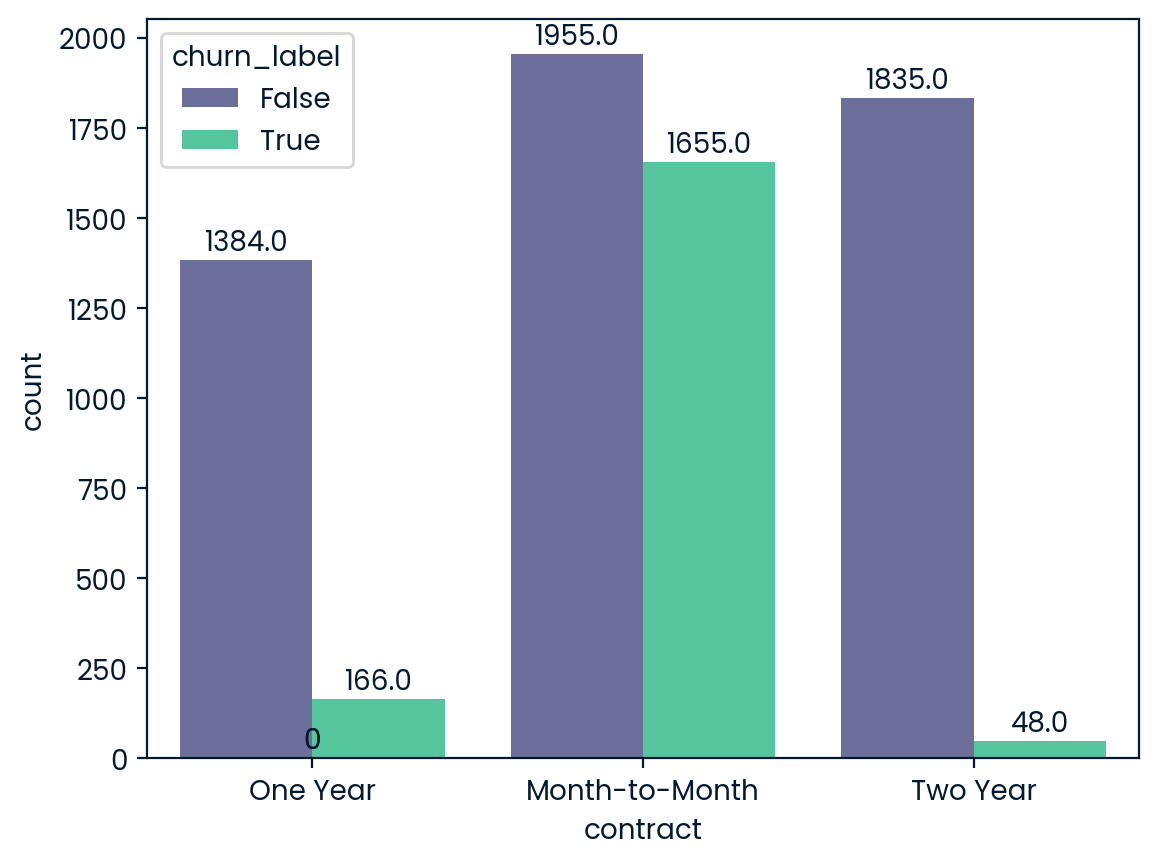


The most churners are from the month-to-month contract type with vert high percentage over the other two: 
Month-to-Month    0.885500
One Year          0.088818
Two Year          0.025682
Name: contract, dtype: float64


In [12]:
ax = sns.countplot(data=churn_full, x='contract', hue='churn_label')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 1),  # 10 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()
print('\nThe most churners are from the month-to-month contract type with vert high percentage over the other two: ')
print(churn_full[churn_full['churn_label']==True]['contract'].value_counts(normalize=True))

## Tenure:

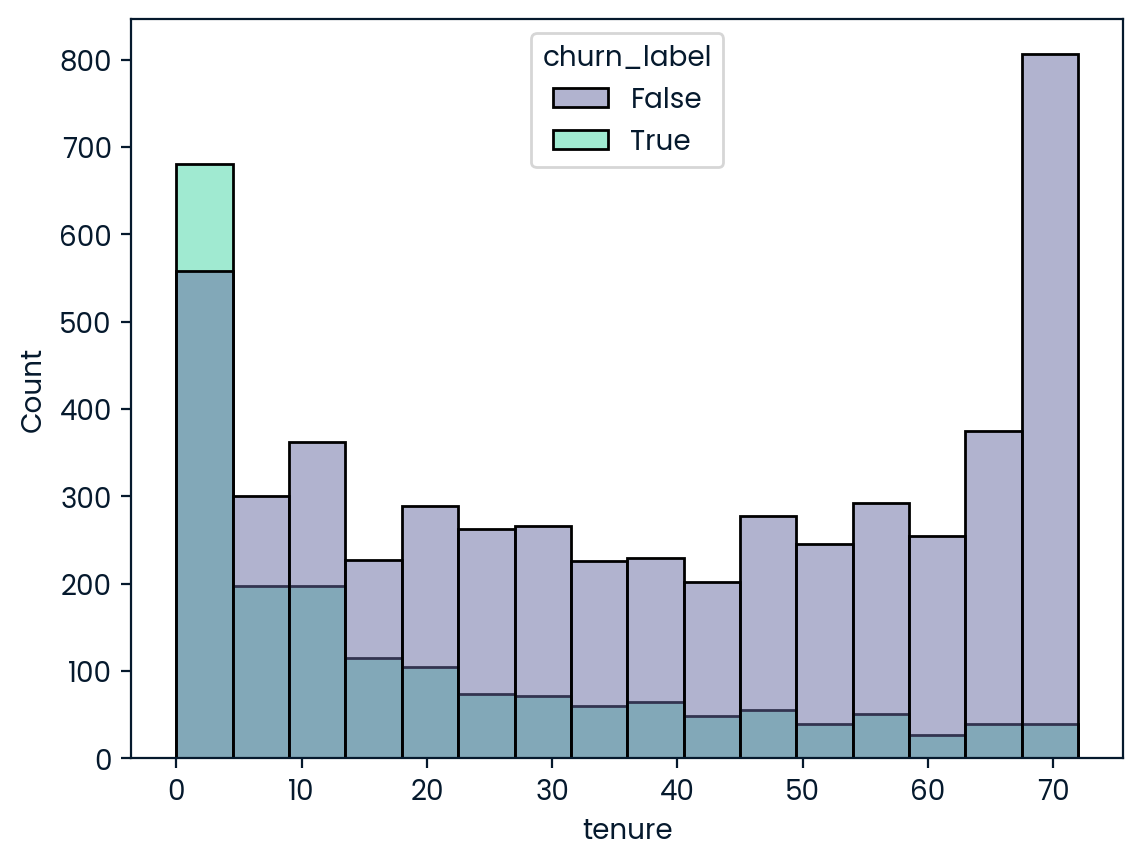

Tenure seems to be exponential and inverse, where long time customers are set with their service, but recent customers decide faster to go or stay.


In [13]:
sns.histplot(data=churn_full, x='tenure', hue='churn_label')
plt.show()
print('Tenure seems to be exponential and inverse, where long time customers are set with their service, but recent customers decide faster to go or stay.')

## Monthly charges:

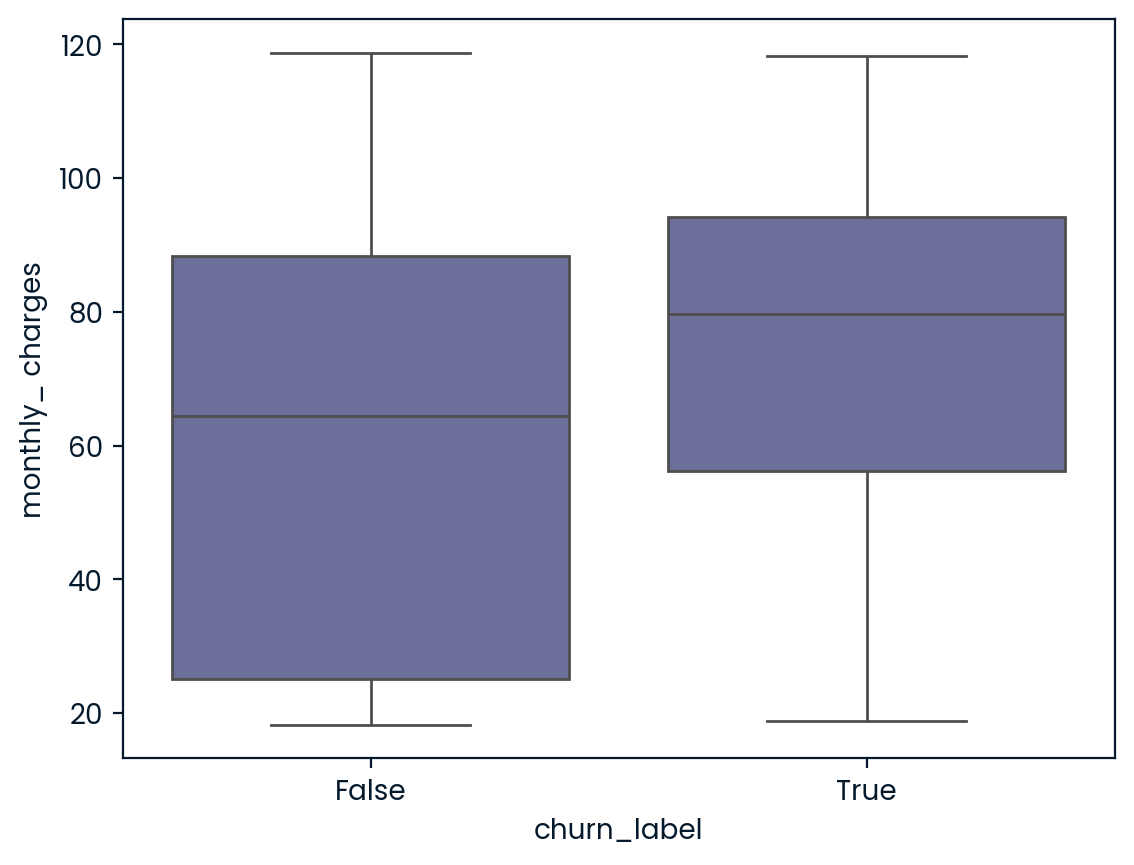

In [14]:
sns.boxplot(data=churn_full, y='monthly_ charges', x='churn_label')
plt.show()

## Having unlimited data:

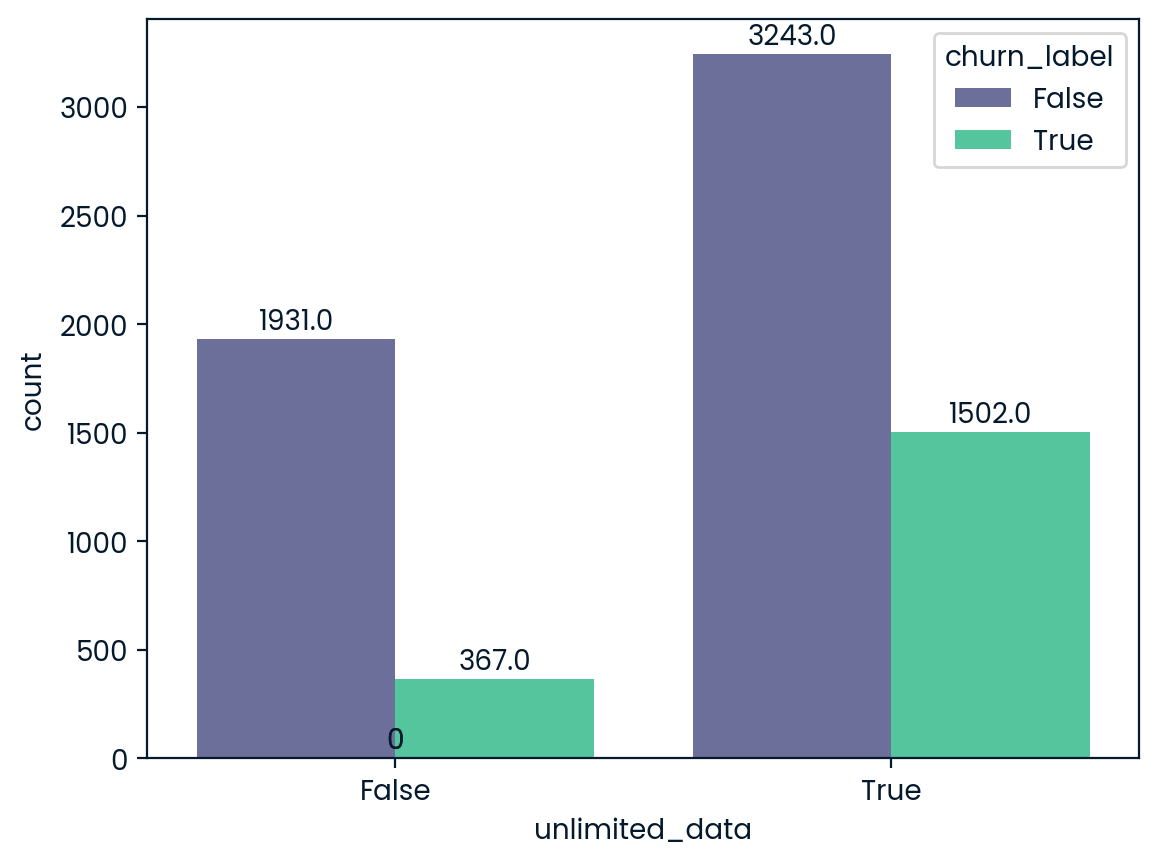

In [15]:
ax = sns.countplot(data=churn_full, x='unlimited_data', hue='churn_label')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 1),  # 10 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

## Having multiple lines:

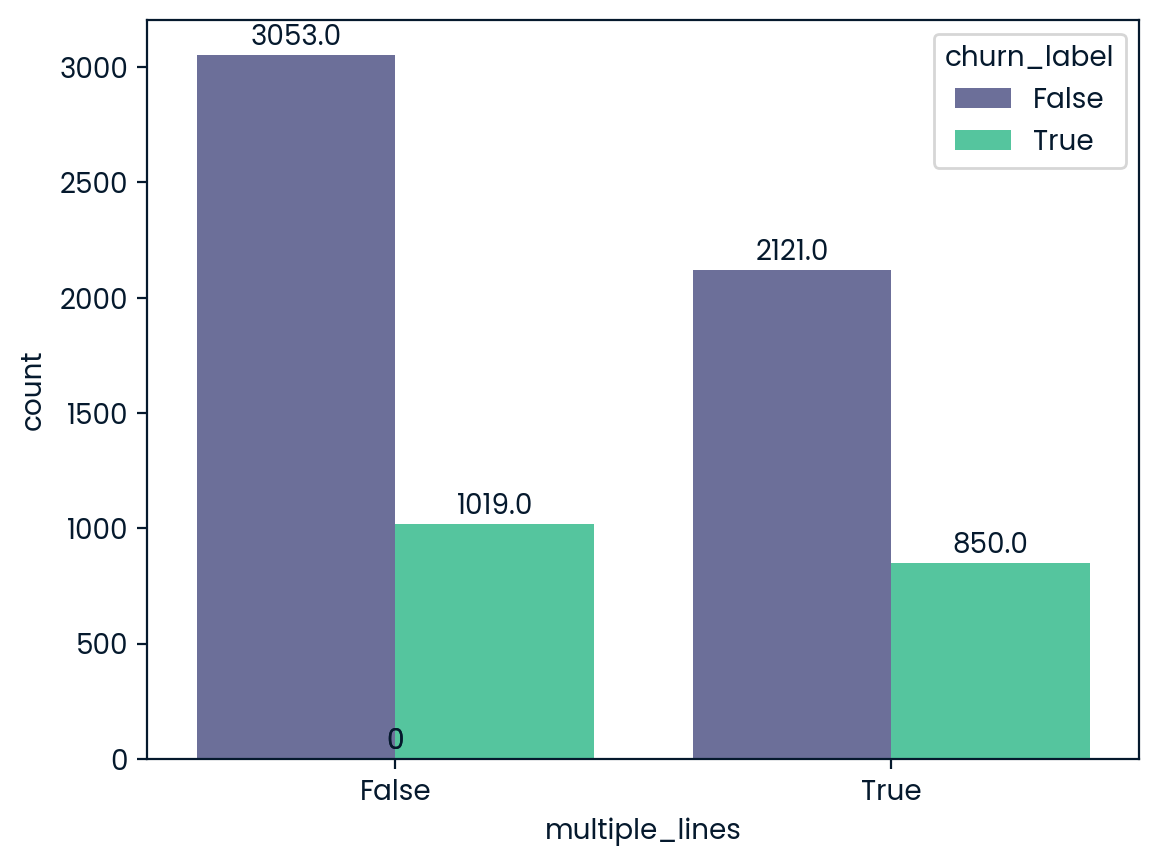

In [16]:
ax = sns.countplot(data=churn_full, x='multiple_lines', hue='churn_label')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 1),  # 10 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

## Having internet service:

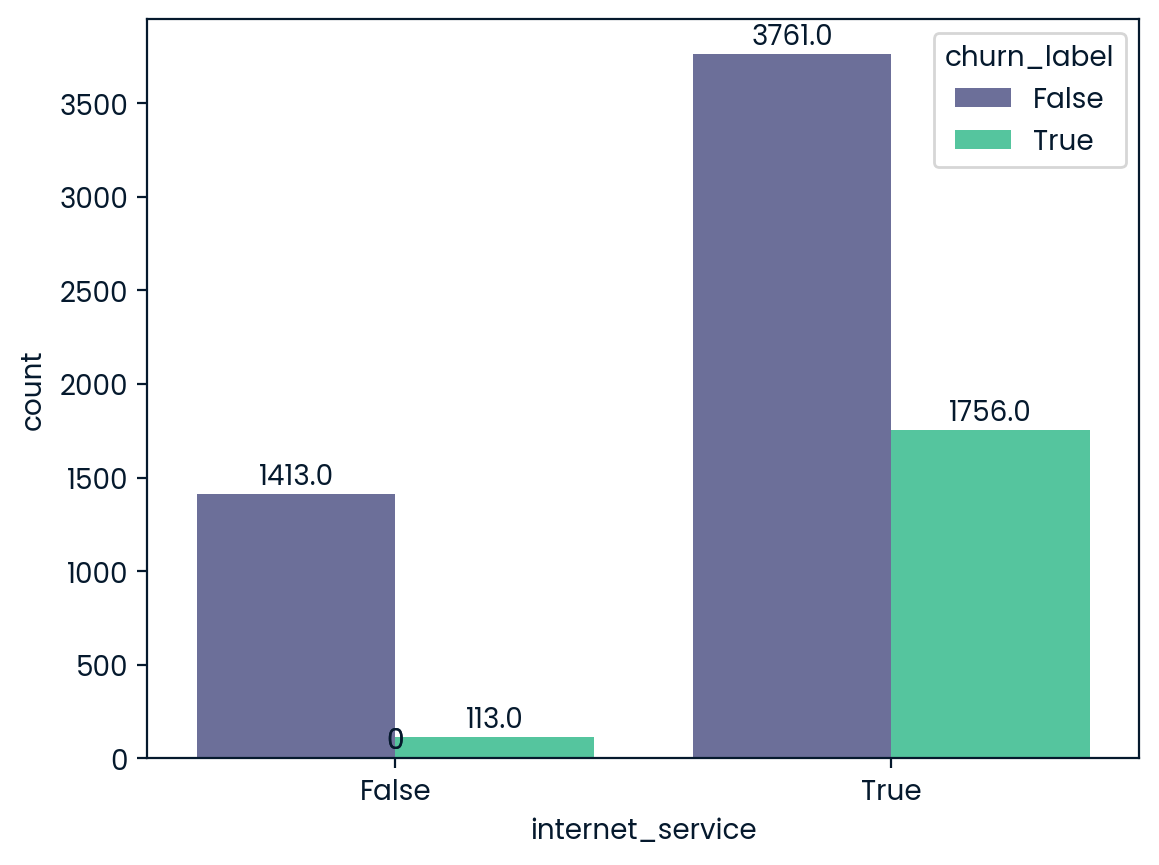

In [17]:
ax = sns.countplot(data=churn_full, x='internet_service', hue='churn_label')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 1),  # 10 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

## Having home phone service:

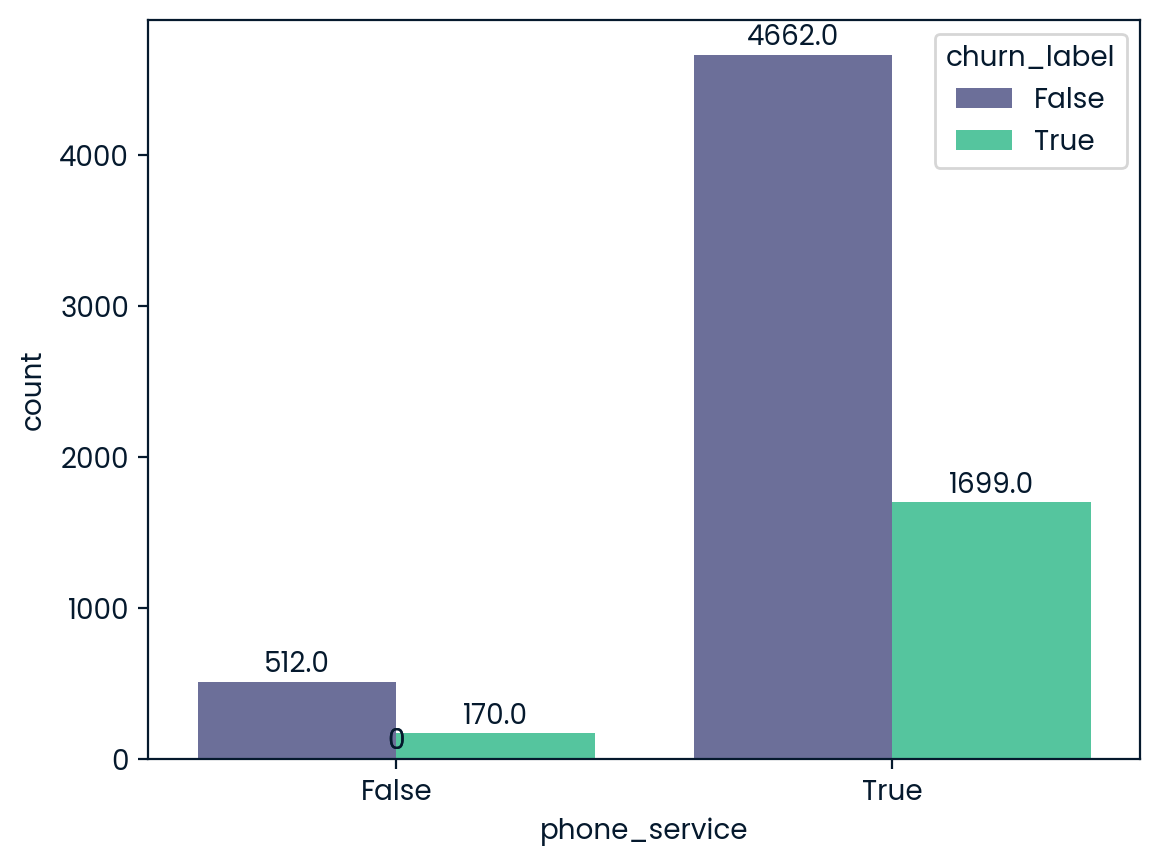

In [18]:
ax = sns.countplot(data=churn_full, x='phone_service', hue='churn_label')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 1),  # 10 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

### It shows a spike on churning for having both services, i want to explore the quality of those reported by satisfaction.

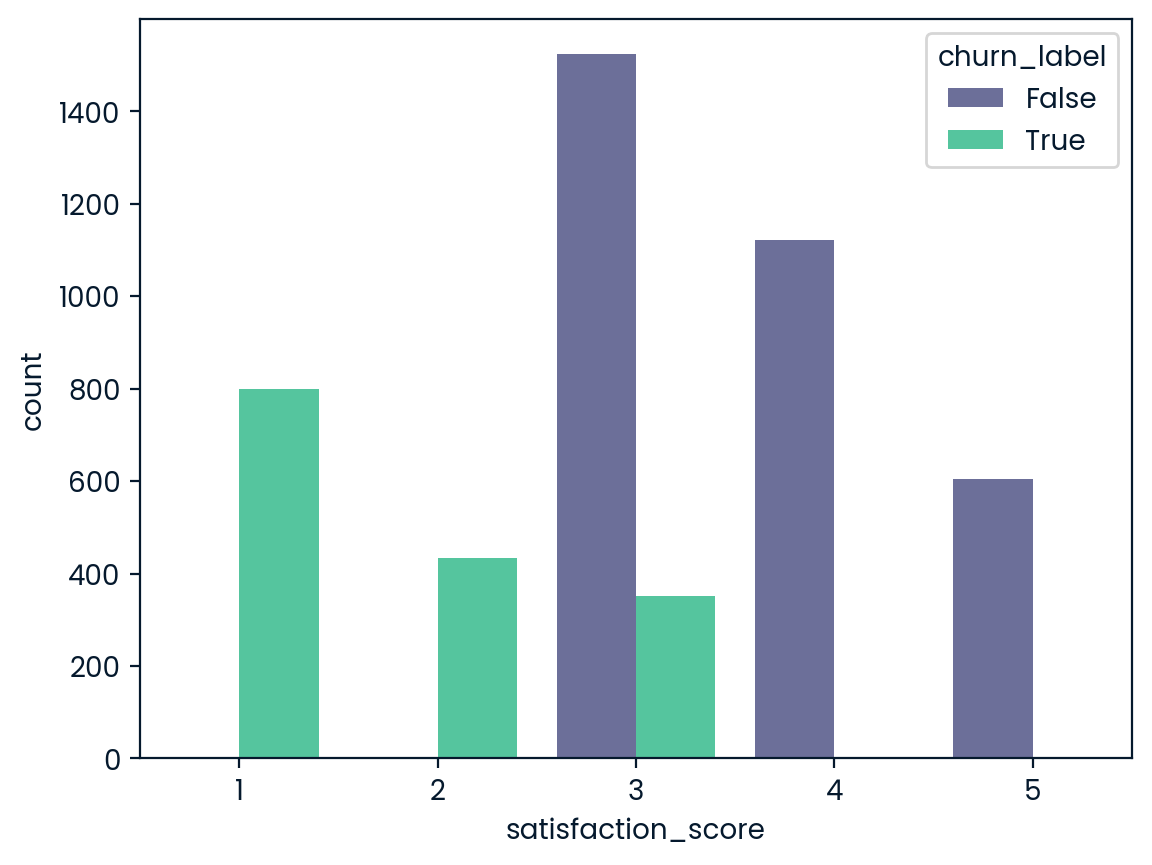

In [19]:
sns.countplot(x='satisfaction_score', data=churn_full[(churn_full['phone_service'] == True)&(churn_full['internet_service'] == True)], hue='churn_label')
plt.show()

### Now, repeat with contract type, taking out the non-churners:

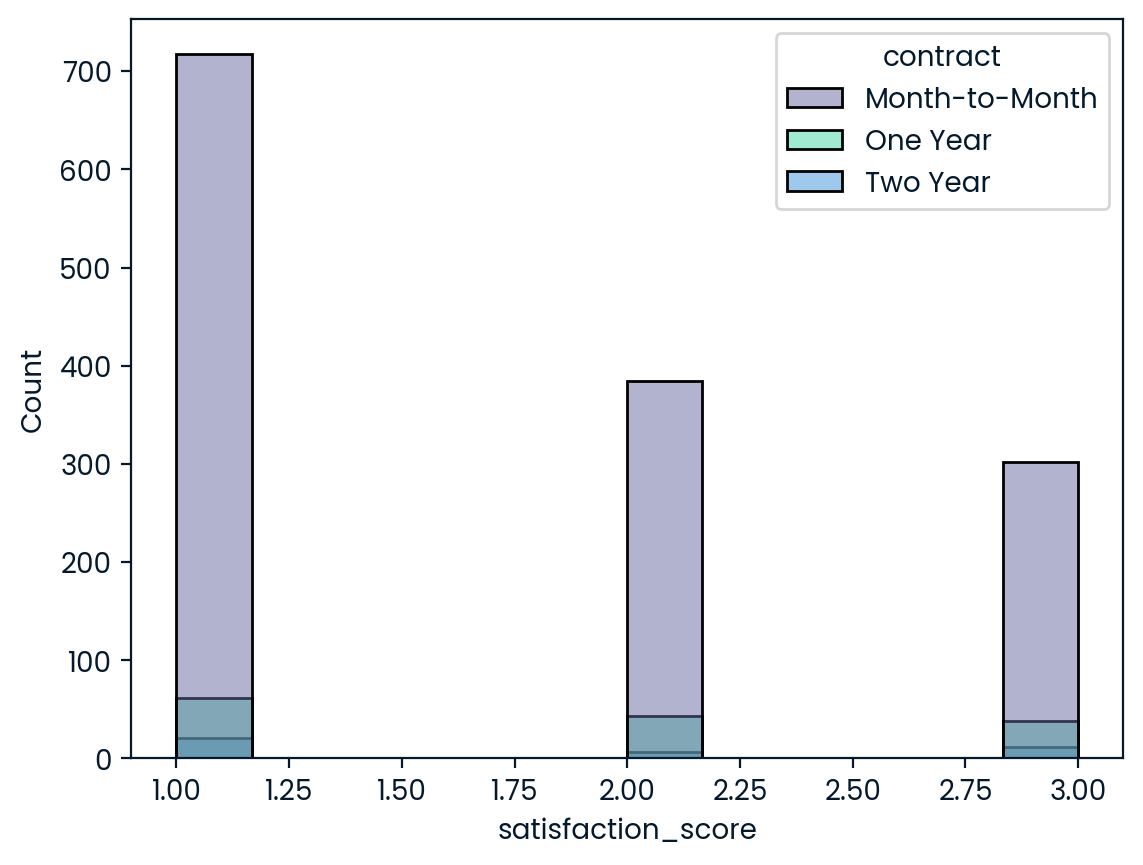

In [20]:
sns.histplot(x='satisfaction_score', data=churn_full[(churn_full['churn_label']==True)&(churn_full['phone_service'] == True)&(churn_full['internet_service'] == True)], hue='contract')
plt.show()

## now to analyze the most common reasons for churning:

churn_category   churn_reason                             
Attitude         Attitude of support person                   220
                 Attitude of service provider                  94
Competitor       Competitor had better devices                313
                 Competitor made better offer                 311
                 Competitor offered more data                 117
                 Competitor offered higher download speeds    100
Dissatisfaction  Product dissatisfaction                       77
                 Network reliability                           72
                 Service dissatisfaction                       63
                 Limited range of services                     37
                 Lack of self-service on Website               29
                 Poor expertise of online support              13
                 Poor expertise of phone support               12
Other            Don't know                                   130
                 

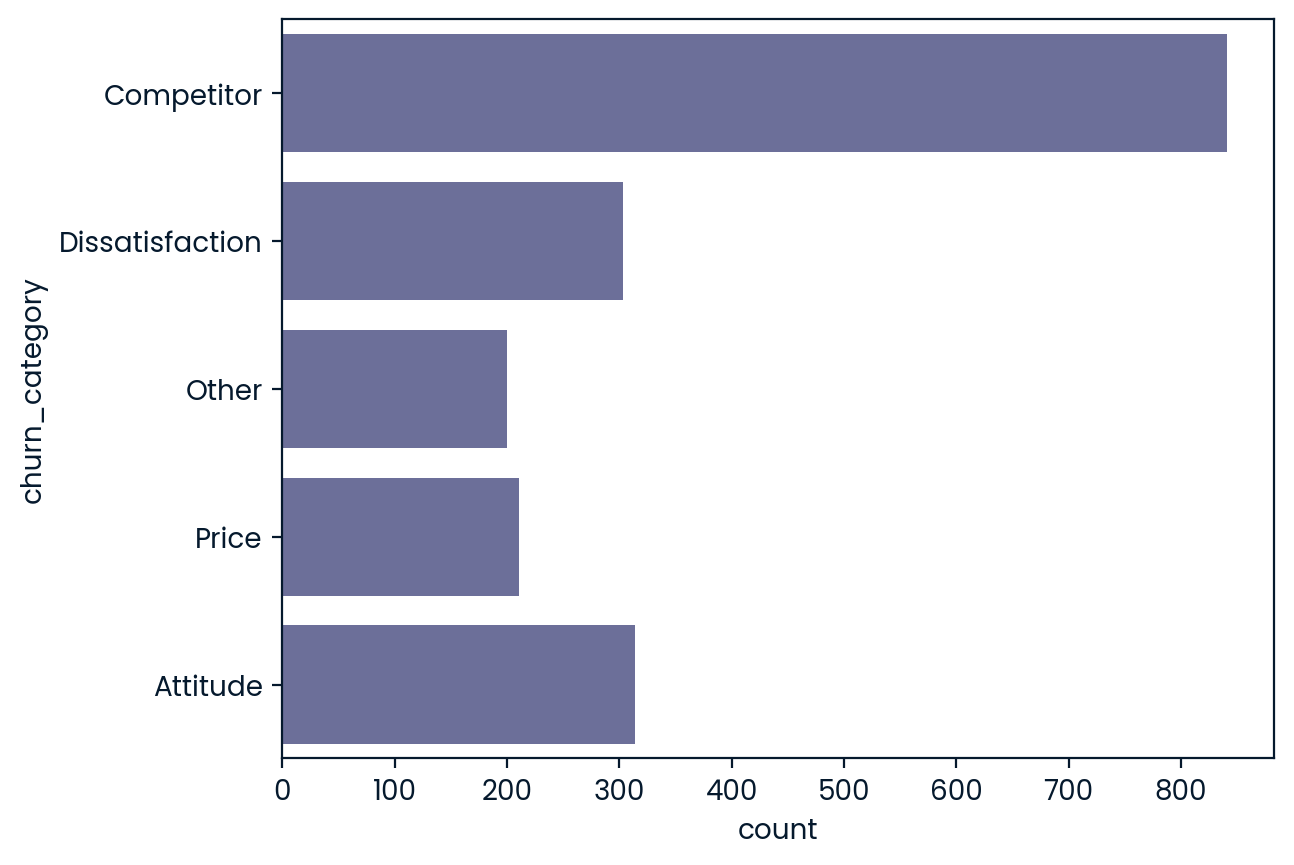

In [21]:
grouped_churn = churn_full.groupby('churn_category')['churn_reason'].value_counts()
print(grouped_churn)
sns.countplot(churn_full[churn_full['churn_category'] != 'Not Applicable']['churn_category'])
plt.show()

testing how likely is the service type affecting the customer churning or not
2.1503502231295044e-141   p-value on the dataset


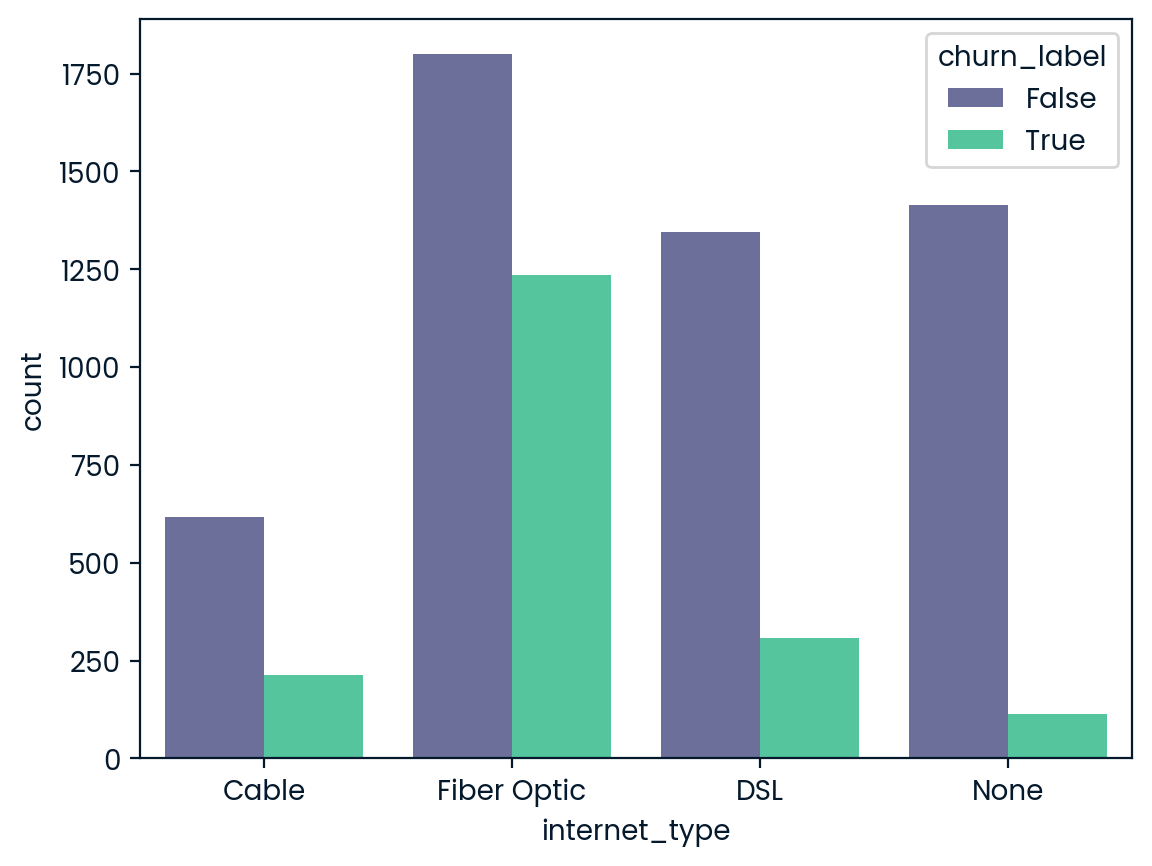

In [22]:
print('testing how likely is the service type affecting the customer churning or not')
contingency_table = pd.crosstab(churn_full['internet_type'],churn_full['churn_label'])
chi2_stat, p_value, dof, expected = stts.chi2_contingency(contingency_table)
print(p_value, '  p-value on the dataset')
sns.countplot(x='internet_type', data=churn_full, hue='churn_label')
plt.show()

test on sampled data:
1.4637805499985025e-136   p-value on the sampled data


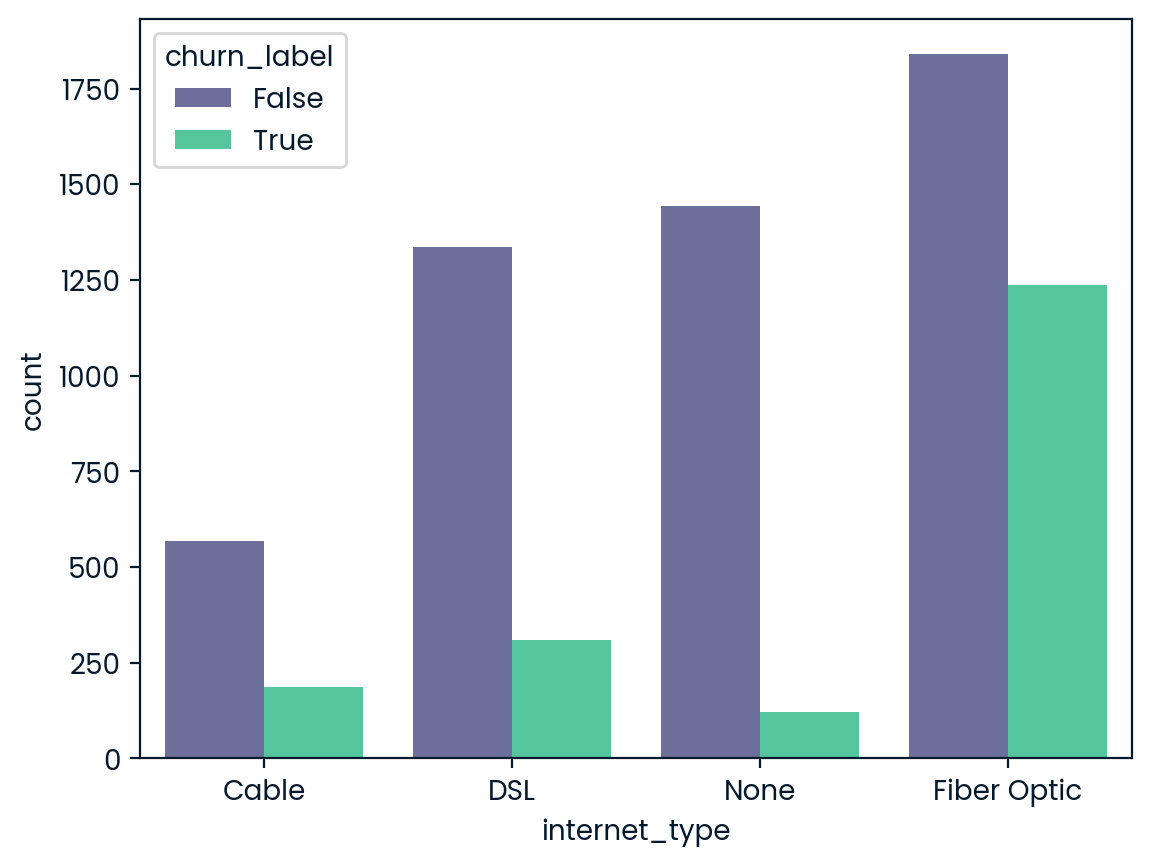

In [23]:
sample = churn_full[['internet_type','churn_label']]
sec_samp = churn_full[['internet_type','churn_label']][:1]
print('test on sampled data:')
for _ in range(40):
    sec_samp = sec_samp.append(sample.sample(frac= 0.025, replace=True))
    
sec_samp.reset_index(drop=True, inplace=True)
contingency_sample = pd.crosstab(sec_samp['internet_type'], sec_samp['churn_label'])
chi2_stat, p_value, dof, expected = stts.chi2_contingency(contingency_sample)
print(p_value, '  p-value on the sampled data')
sns.countplot(x='internet_type', data= sec_samp, hue='churn_label')
plt.show()

## the analysis suggests that customers churn because the services provided are not good enough against the competitors, reflected on the disatisfaction of the quality, and most of the customers that churn were month-to-month contract type, showing the importance of earning their loyalty for a fragile satisfaction. The test for the hypothesis shows an example; where DSL internet connection have the most non-churn vs churn proportion, as it is known to work more stable. proving the option to invest in equipment upgrades is the most suitable in this case, along with better customer support experience. With that, the offers that are available could improve and gain more long-term customers.